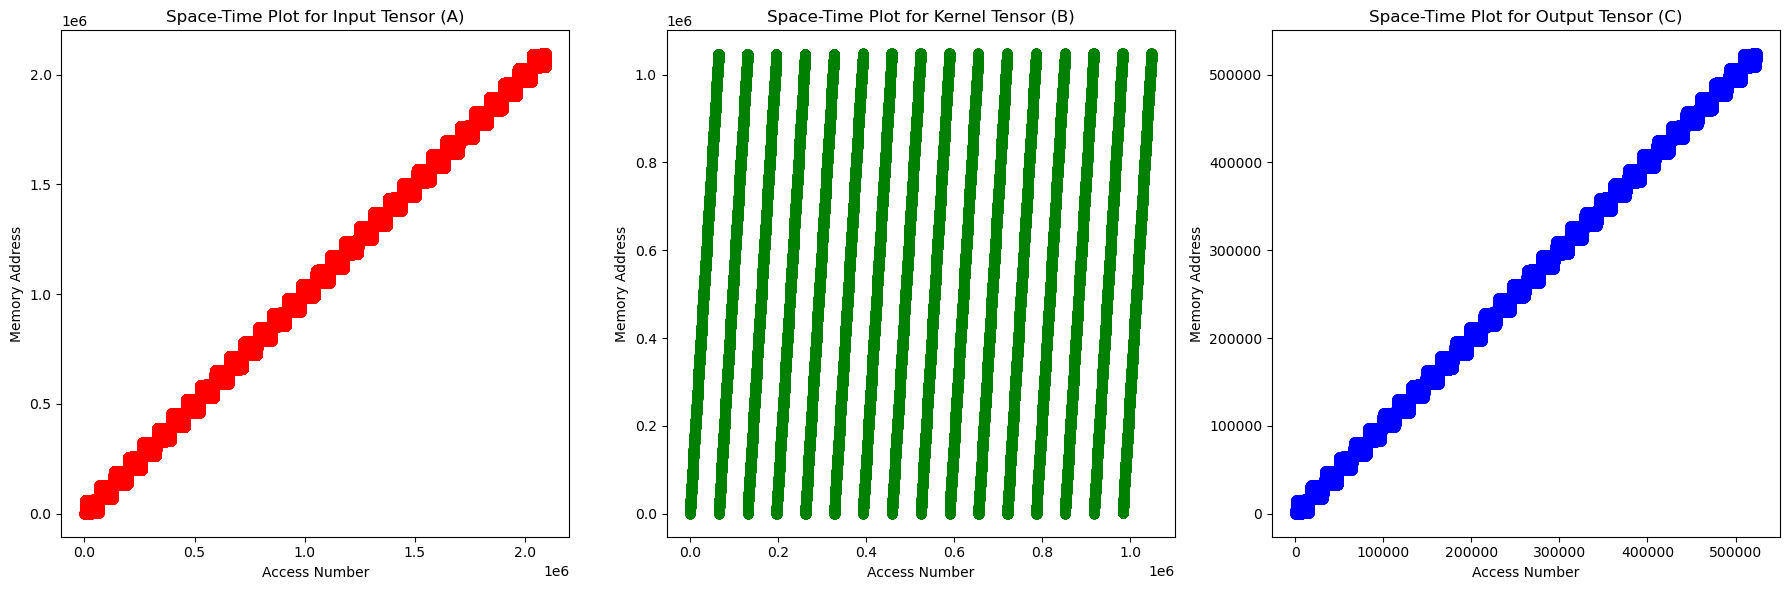

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Representative values for the loop indices
blockIdx_x_values = range(32)
blockIdx_y_values = range(16)
k_outer_values = range(64)
threadIdx_xy_values = range(32)

# Calculate memory accesses for the input tensor (A), kernel tensor (B), and output tensor (C)
memory_accesses_A = [blockIdx_x * 65536 + threadIdx_y * 2048 + k_outer * 32 + ax1 for blockIdx_x in blockIdx_x_values for k_outer in k_outer_values for threadIdx_y in threadIdx_xy_values for ax1 in range(32)]
memory_accesses_B = [k_outer * 16384 + ax0 * 512 + blockIdx_y * 32 + threadIdx_x for blockIdx_y in blockIdx_y_values for k_outer in k_outer_values for threadIdx_x in threadIdx_xy_values for ax0 in range(32)]
memory_accesses_C = [blockIdx_x * 16384 + threadIdx_y * 512 + blockIdx_y * 32 + threadIdx_x for blockIdx_x in blockIdx_x_values for blockIdx_y in blockIdx_y_values for threadIdx_y in threadIdx_xy_values for threadIdx_x in threadIdx_xy_values]

# Create space-time plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot for the input tensor (A)
ax1.scatter(range(len(memory_accesses_A)), memory_accesses_A, color='red')
ax1.set_xlabel('Access Number')
ax1.set_ylabel('Memory Address')
ax1.set_title('Space-Time Plot for Input Tensor (A)')

# Plot for the kernel tensor (B)
ax2.scatter(range(len(memory_accesses_B)), memory_accesses_B, color='green')
ax2.set_xlabel('Access Number')
ax2.set_ylabel('Memory Address')
ax2.set_title('Space-Time Plot for Kernel Tensor (B)')

# Plot for the output tensor (C)
ax3.scatter(range(len(memory_accesses_C)), memory_accesses_C, color='blue')
ax3.set_xlabel('Access Number')
ax3.set_ylabel('Memory Address')
ax3.set_title('Space-Time Plot for Output Tensor (C)')

plt.tight_layout()
plt.show()
